# 第5ステージ DeZeroで挑む

In [1]:
# step52
import os
import sys
sys.path.append('..')

import time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import dezero
import dezero.functions as F
import dezero.layers as L
from dezero import DataLoader, Model, test_mode, optimizers, SeqDataLoader
from dezero.models import MLP, VGG16

max_epoch = 5
batch_size = 100

train_set = dezero.datasets.MNIST(train=True)
train_loader = DataLoader(train_set, batch_size)
model = MLP((1000, 10))
optimizer = optimizers.SGD().setup(model)

# GPU mode
if dezero.cuda.gpu_enable:
    train_loader.to_gpu()
    model.to_gpu()

for epoch in range(max_epoch):
    start = time.time()
    sum_loss = 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        sum_loss += float(loss.data) * len(t)
    
    elapsed_time = time.time() - start
    print('epoch: {}, loss: {:.4f}, time: {:.4f}[sec]'.format(epoch + 1, sum_loss / len(train_set), elapsed_time))

epoch: 1, loss: 1.9155, time: 5.6401[sec]
epoch: 2, loss: 1.2792, time: 4.8405[sec]
epoch: 3, loss: 0.9189, time: 4.7675[sec]
epoch: 4, loss: 0.7353, time: 4.9894[sec]
epoch: 5, loss: 0.6319, time: 4.7904[sec]


In [2]:
# step53
max_epoch = 3
batch_size = 100

train_set = dezero.datasets.MNIST(train=True)
train_loader = DataLoader(train_set, batch_size)
model = MLP((1000, 10))
optimizer = optimizers.SGD().setup(model)

# パラメータの読み込み
if os.path.exists('my_mlp.npz'):
    model.load_weights('my_mlp.npz')

for epoch in range(max_epoch):
    sum_loss = 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        sum_loss += float(loss.data) * len(t)
    
    print('epoch: {}, loss: {:.4f}'.format(epoch + 1, sum_loss / len(train_set)))

model.save_weights('my_mlp.npz')

epoch: 1, loss: 0.3162
epoch: 2, loss: 0.3147
epoch: 3, loss: 0.3134


In [3]:
# step54
x = np.ones(5)
print(x)

# 学習時
y = F.dropout(x)
print(y)

# テスト時
with test_mode():
    y = F.dropout(x)
    print(y)

[1. 1. 1. 1. 1.]
variable([2. 0. 0. 0. 0.])
variable([1. 1. 1. 1. 1.])


In [4]:
# step55
def get_conv_outsize(input_size, kernel_size, stride, pad):
    return (input_size + pad * 2 - kernel_size) // stride + 1

H, W = 4, 4  # input_shape
KH, KW = 3, 3  # kernel_size
SH, SW = 1, 1  # stride（縦方向のストライド、横方向のストライド）
PH, PW = 1, 1  # padding（縦方向のパディング、横方向のパディング）

OH = get_conv_outsize(H, KH, SH, PH)
OW = get_conv_outsize(W, KW, SW, PW)
print(OH, OW)

4 4


In [5]:
# step56
# No code

# step57
x1 = np.random.rand(1, 3, 7, 7)
col1 = F.im2col(x1, kernel_size=5, stride=1, pad=0, to_matrix=True)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)  # 10個のデータ
kernel_size = (5, 5)
stride = (1, 1)
pad = (0, 0)
col2 = F.im2col(x2, kernel_size, stride, pad, to_matrix=True)
print(col2.shape)

N, C, H, W = 1, 5, 15, 15
OC, (KH, KW) = 8, (3, 3)

x = dezero.Variable(np.random.randn(N, C, H, W))
W = np.random.randn(OC, C, KH, KW)
y = F.conv2d_simple(x, W, b=None, stride=1, pad=1)
y.backward()

print(y.shape)
print(x.grad.shape)

(9, 75)
(90, 75)
(1, 8, 15, 15)
(1, 5, 15, 15)


In [6]:
# step58
url = 'https://github.com/oreilly-japan/deep-learning-from-scratch-3/raw/images/zebra.jpg'
img_path = dezero.utils.get_file(url)
img = Image.open(img_path)
x = VGG16.preprocess(img)
x = x[np.newaxis]  # バッチ用の軸を追加

model = VGG16(pretrained=True)
with dezero.test_mode():
    y = model(x)
predict_id = np.argmax(y.data)

model.plot(x, to_file='vgg.pdf')  # 計算グラフの可視化
labels = dezero.datasets.ImageNet.labels()  # ImageNetのラベル
print(labels[predict_id])

zebra


| epoch 1 | loss 0.103274
| epoch 2 | loss 0.044556
| epoch 3 | loss 0.012510
| epoch 4 | loss 0.003618
| epoch 5 | loss 0.003729
| epoch 6 | loss 0.001687
| epoch 7 | loss 0.002651
| epoch 8 | loss 0.001771
| epoch 9 | loss 0.002626
| epoch 10 | loss 0.003539
| epoch 11 | loss 0.004873
| epoch 12 | loss 0.006181
| epoch 13 | loss 0.006309
| epoch 14 | loss 0.005399
| epoch 15 | loss 0.004772
| epoch 16 | loss 0.004771
| epoch 17 | loss 0.005005
| epoch 18 | loss 0.005076
| epoch 19 | loss 0.004878
| epoch 20 | loss 0.004593
| epoch 21 | loss 0.004410
| epoch 22 | loss 0.004342
| epoch 23 | loss 0.004335
| epoch 24 | loss 0.004314
| epoch 25 | loss 0.004243
| epoch 26 | loss 0.004158
| epoch 27 | loss 0.004074
| epoch 28 | loss 0.003979
| epoch 29 | loss 0.003915
| epoch 30 | loss 0.003828
| epoch 31 | loss 0.003720
| epoch 32 | loss 0.003608
| epoch 33 | loss 0.003521
| epoch 34 | loss 0.003467
| epoch 35 | loss 0.003428
| epoch 36 | loss 0.003399
| epoch 37 | loss 0.003382
| epoch 38

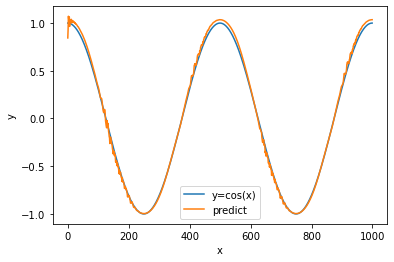

In [7]:
# step59
class SimpleRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.rnn = L.RNN(hidden_size)
        self.fc = L.Linear(out_size)

    def reset_state(self):
        self.rnn.reset_state()

    def forward(self, x):
        h = self.rnn(x)
        y = self.fc(h)
        return y

# ハイパーパラメータの設定
max_epoch = 100
hidden_size = 100
bptt_length = 30  # BPTTの長さ

train_set = dezero.datasets.SinCurve(train=True)
seqlen = len(train_set)

model = SimpleRNN(hidden_size, 1)
optimizer = dezero.optimizers.Adam().setup(model)

# 学習の開始
for epoch in range(max_epoch):
    model.reset_state()
    loss, count = 0, 0

    for x, t in train_set:
        x = x.reshape(1, 1)  # ①形状を(1, 1)へ変換
        y = model(x)
        loss += F.mean_squared_error(y, t)
        count += 1

        # ②Truncated BPTTのタイミングを調整
        if count % bptt_length == 0 or count == seqlen:
            model.cleargrads()
            loss.backward()
            loss.unchain_backward()  # ③つながりを切る
            optimizer.update()
    
    avg_loss = float(loss.data) / count
    print('| epoch %d | loss %f' % (epoch + 1, avg_loss))

xs = np.cos(np.linspace(0, 4 * np.pi, 1000))
model.reset_state()  # モデルのリセット
pred_list = []

with dezero.no_grad():
    for x in xs:
        x = np.array(x).reshape(1, 1)
        y = model(x)
        pred_list.append(float(y.data))

plt.plot(np.arange(len(xs)), xs, label='y=cos(x)')
plt.plot(np.arange(len(xs)), pred_list, label='predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

| epoch 1 | loss 0.413096
| epoch 2 | loss 0.322443
| epoch 3 | loss 0.245405
| epoch 4 | loss 0.182262
| epoch 5 | loss 0.132950
| epoch 6 | loss 0.096968
| epoch 7 | loss 0.073209
| epoch 8 | loss 0.059771
| epoch 9 | loss 0.053937
| epoch 10 | loss 0.052654
| epoch 11 | loss 0.053362
| epoch 12 | loss 0.054449
| epoch 13 | loss 0.055118
| epoch 14 | loss 0.055039
| epoch 15 | loss 0.054087
| epoch 16 | loss 0.052248
| epoch 17 | loss 0.049618
| epoch 18 | loss 0.046403
| epoch 19 | loss 0.042881
| epoch 20 | loss 0.039342
| epoch 21 | loss 0.036034
| epoch 22 | loss 0.033131
| epoch 23 | loss 0.030718
| epoch 24 | loss 0.028802
| epoch 25 | loss 0.027328
| epoch 26 | loss 0.026204
| epoch 27 | loss 0.025327
| epoch 28 | loss 0.024604
| epoch 29 | loss 0.023965
| epoch 30 | loss 0.023365
| epoch 31 | loss 0.022786
| epoch 32 | loss 0.022225
| epoch 33 | loss 0.021693
| epoch 34 | loss 0.021199
| epoch 35 | loss 0.020752
| epoch 36 | loss 0.020350
| epoch 37 | loss 0.019983
| epoch 38

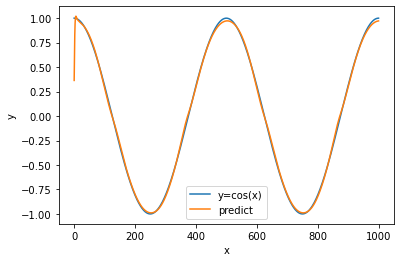

In [8]:
# step60
max_epoch = 100
batch_size = 30
hidden_size = 100
bptt_length = 30

train_set = dezero.datasets.SinCurve(train=True)
# ①時系列用のデータローダを使用
dataloader = SeqDataLoader(train_set, batch_size=batch_size)
seqlen = len(train_set)


class BetterRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.rnn = L.LSTM(hidden_size)  # ②LSTMを使用
        self.fc = L.Linear(out_size)

    def reset_state(self):
        self.rnn.reset_state()

    def forward(self, x):
        y = self.rnn(x)
        y = self.fc(y)
        return y

model = BetterRNN(hidden_size, 1)
optimizer = dezero.optimizers.Adam().setup(model)

for epoch in range(max_epoch):
    model.reset_state()
    loss, count = 0, 0

    for x, t in dataloader:
        y = model(x)
        loss += F.mean_squared_error(y, t)
        count += 1

        if count % bptt_length == 0 or count == seqlen:
            model.cleargrads()
            loss.backward()
            loss.unchain_backward()
            optimizer.update()


    avg_loss = float(loss.data) / count
    print('| epoch %d | loss %f' % (epoch + 1, avg_loss))

# Plot
xs = np.cos(np.linspace(0, 4 * np.pi, 1000))
model.reset_state()
pred_list = []

with dezero.no_grad():
    for x in xs:
        x = np.array(x).reshape(1, 1)
        y = model(x)
        pred_list.append(float(y.data))

plt.plot(np.arange(len(xs)), xs, label='y=cos(x)')
plt.plot(np.arange(len(xs)), pred_list, label='predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()